In [1]:
%matplotlib inline

import cosima_cookbook as cc
import matplotlib.pyplot as plt
import numpy as np
import netCDF4 as nc
import xarray as xr
import cmocean as cm
from collections import OrderedDict
import cftime
import glob

import logging
logging.captureWarnings(True)
logging.getLogger('py.warnings').setLevel(logging.ERROR)

from dask.distributed import Client

In [2]:
client = Client()
client

Client Scheduler: tcp://127.0.0.1:37803 Dashboard: /proxy/8787/status,Cluster Workers: 8 Cores: 48 Memory: 202.49 GB


In [3]:
session = cc.database.create_session('/g/data/ik11/databases/SAMx.db')

In [4]:
## 1deg cases
#cc.database.build_index('/g/data/hh5/tmp/cosima/access-om2/1deg_jra55_ryf9091_kds50_july_bkd',session,update=True)
cc.database.build_index('/g/data/hh5/tmp/cosima/access-om2/1deg_jra55_ryf9091_kds50_july',session,update=True)
#cc.database.build_index(glob.glob('/g/data/hh5/tmp/cosima/access-om2/1deg_jra55_SAMextr_ryf????_from9091_kds50'),session,update=True)

## 025deg case
#cc.database.build_index('/g/data/hh5/tmp/cosima/access-om2-025/025deg_jra55v13_ryf9091_gmredi6',session,update=True)
#cc.database.build_index(glob.glob('/g/data/hh5/tmp/cosima/access-om2-025/025deg_jra55v13_SAMx_????_from_ryf9091_yr160_gmredi6'),session,update=True)

## 01deg case
#cc.database.build_index('/g/data/ik11/outputs/access-om2-01/01deg_jra55v13_ryf9091',session,update=True)
#cc.database.build_index(glob.glob('/g/data/hh5/tmp/cosima/access-om2-01/01deg_jra55_SAMextr*'),session,update=True)

Indexing experiment: 1deg_jra55_ryf9091_kds50_july


0it [00:00, ?it/s]


0

In [5]:
exptdict = OrderedDict([
    ('01deg_RYF9091',   {'expt':'01deg_jra55v13_ryf9091','dir':'access-om2-01'}),
    ('01deg_SAM-0203',   {'expt':'01deg_jra55_SAMextr_0203_from9091','dir':'access-om2-01'}),
    ('01deg_SAM+9899',   {'expt':'01deg_jra55_SAMextr_9899_from9091','dir':'access-om2-01'}),
    ('01deg_SAM-9192',   {'expt':'01deg_jra55_SAMextr_9192_from9091','dir':'access-om2-01'}),
    ('01deg_SAM+1011',   {'expt':'01deg_jra55_SAMextr_1011_from9091_kial','dir':'access-om2-01'}),
    ('025deg_RYF9091',  {'expt':'025deg_jra55v13_ryf9091_gmredi6','dir':'access-om2-025'}),
    ('025deg_SAM-0203',  {'expt':'025deg_jra55v13_SAMx_0203_from_ryf9091_yr160_gmredi6','dir':'access-om2-025'}),
    ('025deg_SAM+9899',  {'expt':'025deg_jra55v13_SAMx_9899_from_ryf9091_yr160_gmredi6','dir':'access-om2-025'}),
    ('025deg_SAM-9192',  {'expt':'025deg_jra55v13_SAMx_9192_from_ryf9091_yr160_gmredi6','dir':'access-om2-025'}),
    ('025deg_SAM+1011',  {'expt':'025deg_jra55v13_SAMx_1011_from_ryf9091_yr160_gmredi6','dir':'access-om2-025'}),
    ('1deg_RYF9091',  {'expt':'1deg_jra55_ryf9091_kds50_july_bkd','dir':'access-om2'}),
    ('1deg_SAM-0203',  {'expt':'1deg_jra55_SAMextr_ryf0203_from9091_kds50','dir':'access-om2'}),
    ('1deg_SAM+9899',  {'expt':'1deg_jra55_SAMextr_ryf9899_from9091_kds50','dir':'access-om2'}),
    ('1deg_SAM-9192',  {'expt':'1deg_jra55_SAMextr_ryf9192_from9091_kds50','dir':'access-om2'}),
    ('1deg_SAM+1011',  {'expt':'1deg_jra55_SAMextr_ryf1011_from9091_kds50','dir':'access-om2'})
                        ])


distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)


Text(0, 0.5, 'KE')

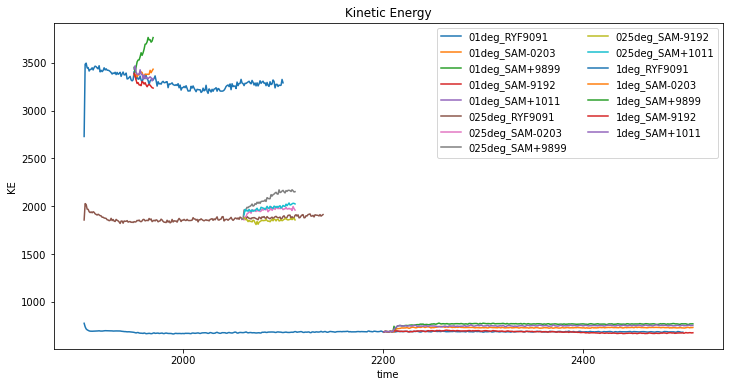

In [9]:
plt.figure(figsize=(12,6))
for ekey in exptdict.keys():
    variable = 'ke_tot'
    expt = exptdict[ekey]['expt']
    var = cc.querying.getvar(expt,variable,session)
    var.resample(time='A').mean().plot(label=ekey)

plt.legend(ncol=2,loc=1)
plt.title('Kinetic Energy')
plt.ylabel('KE')

1deg_jra55_ryf9091_kds50_july_bkd
1deg_jra55_SAMextr_ryf9899_from9091_kds50
1deg_jra55_SAMextr_ryf1011_from9091_kds50
1deg_jra55_SAMextr_ryf9192_from9091_kds50
1deg_jra55_SAMextr_ryf0203_from9091_kds50


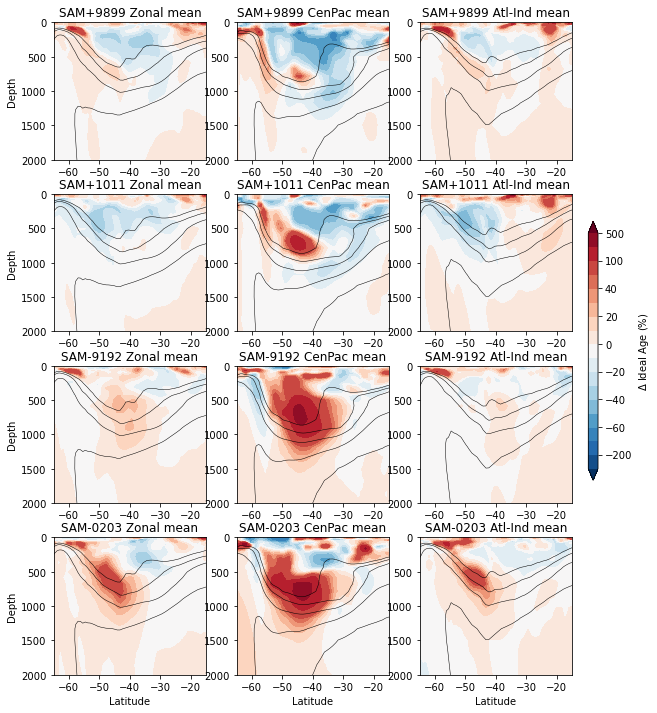

In [10]:
variable = 'age_global'
start_time='2229-01-01'
end_time = '2229-12-31'
lev1 = [-500,  -200, -100, -60, -50, -40, -30, -20, -10, 0, 10, 20, 30, 40, 50, 100, 200, 500]
lev2 = [25, 50, 100, 200, 300]
ekey='1deg_RYF9091'
expt = exptdict[ekey]['expt']
print(expt)
var = cc.querying.getvar(expt,variable,session,ncfile='ocean.nc',start_time='2200-01-01', end_time=end_time).sel(time=slice(start_time,end_time))
zonalage_RYF = var.mean('time').mean('xt_ocean')
CPage_RYF = var.mean('time').sel(xt_ocean=slice(-170,-100)).mean('xt_ocean')
wrk1 = var.mean('time').sel(xt_ocean=slice(-60,None))
wrk2 = var.mean('time').sel(xt_ocean=slice(None,-240))
AIage_RYF = xr.concat([wrk1, wrk2], dim='xt_ocean').mean('xt_ocean')

fig,ax = plt.subplots(4,3,figsize=(9,12))
plt.subplots_adjust(left=0.075, right=0.875,hspace=0.25)
ii=0
for ekey in ['1deg_SAM+9899','1deg_SAM+1011','1deg_SAM-9192','1deg_SAM-0203']:
    expt = exptdict[ekey]['expt']
    print(expt)
    var = cc.querying.getvar(expt,variable,session,ncfile='ocean.nc',start_time='2200-01-01', end_time=end_time).sel(time=slice(start_time,end_time))
    zonalage_SAM = 100*(var.mean('time').mean('xt_ocean') - zonalage_RYF)/zonalage_RYF
    #zonalage_SAM = (var.mean('time').mean('xt_ocean') - zonalage_RYF)
    p1 = zonalage_SAM.plot.contourf(ax=ax[ii,0],levels=lev1, extend='both', add_colorbar=False)
    zonalage_RYF.plot.contour(ax=ax[ii,0],levels=lev2,colors='k',linewidths=0.5)
    
    ax[ii,0].set_xlim([-65,-15])
    ax[ii,0].set_ylim([0,2000])
    ax[ii,0].set_ylabel('Depth')
    if ii<3:
        ax[ii,0].set_xlabel('')
    else:
        ax[ii,0].set_xlabel('Latitude')    
    ax[ii,0].invert_yaxis()
    ax[ii,0].set_title(ekey.lstrip('1deg_')+' Zonal mean')
    
    CPage_SAM = 100*(var.mean('time').sel(xt_ocean=slice(-170,-100)).mean('xt_ocean') - CPage_RYF)/CPage_RYF
    CPage_SAM.plot.contourf(ax=ax[ii,1],levels=lev1, extend='both', add_colorbar=False)
    CPage_RYF.plot.contour(ax=ax[ii,1],levels=lev2,colors='k',linewidths=0.5)
    
    ax[ii,1].set_xlim([-65,-15])
    ax[ii,1].set_ylim([0,2000])
    ax[ii,1].set_ylabel('')
    if ii<3:
        ax[ii,1].set_xlabel('')
    else:
        ax[ii,1].set_xlabel('Latitude')
    ax[ii,1].invert_yaxis()
    ax[ii,1].set_title(ekey.lstrip('1deg_')+' CenPac mean')
    
    
    wrk1 = var.mean('time').sel(xt_ocean=slice(-60,None))
    wrk2 = var.mean('time').sel(xt_ocean=slice(None,-240))
    AIage_SAM = 100*(xr.concat([wrk1, wrk2], dim='xt_ocean').mean('xt_ocean') - AIage_RYF)/AIage_RYF
    AIage_SAM.plot.contourf(ax=ax[ii,2],levels=lev1, extend='both', add_colorbar=False)
    AIage_RYF.plot.contour(ax=ax[ii,2],levels=lev2,colors='k',linewidths=0.5)
    
    ax[ii,2].set_xlim([-65,-15])
    ax[ii,2].set_ylim([0,2000])
    ax[ii,2].set_ylabel('')
    if ii<3:
        ax[ii,2].set_xlabel('')
    else:
        ax[ii,2].set_xlabel('Latitude')
    ax[ii,2].invert_yaxis()
    ax[ii,2].set_title(ekey.lstrip('1deg_')+' Atl-Ind mean')
    
    ii+=1
    
ax_cb = plt.axes([0.9, 0.35, 0.015, 0.3])
cb = plt.colorbar(p1, cax=ax_cb,orientation='vertical')
cb.set_label('$\Delta$ Ideal Age (%)')
plt.savefig('Age_yr19_1deg.pdf')

025deg_jra55v13_ryf9091_gmredi6
025deg_jra55v13_SAMx_9899_from_ryf9091_yr160_gmredi6
025deg_jra55v13_SAMx_1011_from_ryf9091_yr160_gmredi6
025deg_jra55v13_SAMx_9192_from_ryf9091_yr160_gmredi6
025deg_jra55v13_SAMx_0203_from_ryf9091_yr160_gmredi6


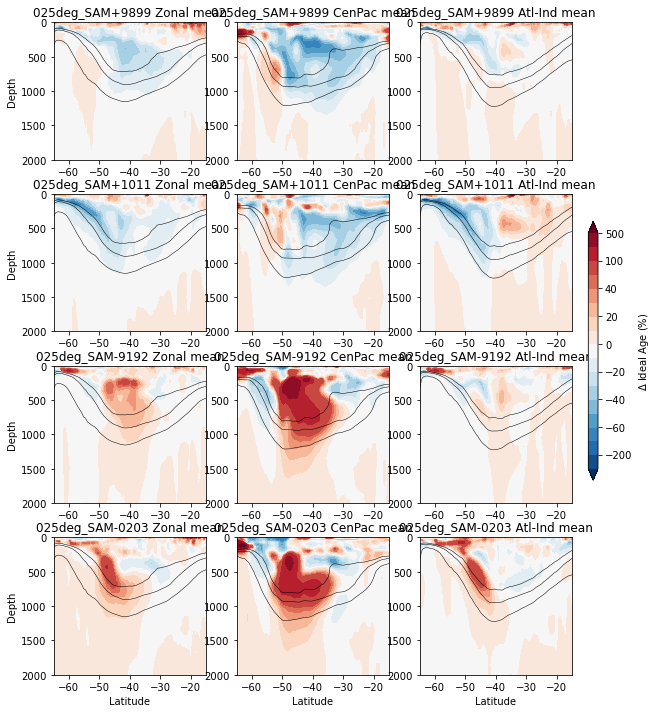

In [11]:
variable = 'age_global'
start_time='2079-01-01'
end_time = '2079-12-31'
lev1 = [-500,  -200, -100, -60, -50, -40, -30, -20, -10, 0, 10, 20, 30, 40, 50, 100, 200, 500]
lev2 = [25, 50, 100, 200, 300]
ekey='025deg_RYF9091'
expt = exptdict[ekey]['expt']
print(expt)
var = cc.querying.getvar(expt,variable,session,ncfile='ocean.nc',start_time='2060-01-01', end_time=end_time).sel(time=slice(start_time,end_time))
zonalage_RYF = var.mean('time').mean('xt_ocean')
CPage_RYF = var.mean('time').sel(xt_ocean=slice(-170,-100)).mean('xt_ocean')
wrk1 = var.mean('time').sel(xt_ocean=slice(-60,None))
wrk2 = var.mean('time').sel(xt_ocean=slice(None,-240))
AIage_RYF = xr.concat([wrk1, wrk2], dim='xt_ocean').mean('xt_ocean')

fig,ax = plt.subplots(4,3,figsize=(9,12))
plt.subplots_adjust(left=0.075, right=0.875,hspace=0.25)
ii=0
for ekey in ['025deg_SAM+9899','025deg_SAM+1011','025deg_SAM-9192','025deg_SAM-0203']:
    expt = exptdict[ekey]['expt']
    print(expt)
    var = cc.querying.getvar(expt,variable,session,ncfile='ocean.nc',start_time='2060-01-01', end_time=end_time).sel(time=slice(start_time,end_time))
    zonalage_SAM = 100*(var.mean('time').mean('xt_ocean') - zonalage_RYF)/zonalage_RYF
    #zonalage_SAM = (var.mean('time').mean('xt_ocean') - zonalage_RYF)
    p1 = zonalage_SAM.plot.contourf(ax=ax[ii,0],levels=lev1, extend='both', add_colorbar=False)
    zonalage_RYF.plot.contour(ax=ax[ii,0],levels=lev2,colors='k',linewidths=0.5)
    
    ax[ii,0].set_xlim([-65,-15])
    ax[ii,0].set_ylim([0,2000])
    ax[ii,0].set_ylabel('Depth')
    if ii<3:
        ax[ii,0].set_xlabel('')
    else:
        ax[ii,0].set_xlabel('Latitude')    
    ax[ii,0].invert_yaxis()
    ax[ii,0].set_title(ekey.lstrip('1deg_')+' Zonal mean')
    
    CPage_SAM = 100*(var.mean('time').sel(xt_ocean=slice(-170,-100)).mean('xt_ocean') - CPage_RYF)/CPage_RYF
    CPage_SAM.plot.contourf(ax=ax[ii,1],levels=lev1, extend='both', add_colorbar=False)
    CPage_RYF.plot.contour(ax=ax[ii,1],levels=lev2,colors='k',linewidths=0.5)
    
    ax[ii,1].set_xlim([-65,-15])
    ax[ii,1].set_ylim([0,2000])
    ax[ii,1].set_ylabel('')
    if ii<3:
        ax[ii,1].set_xlabel('')
    else:
        ax[ii,1].set_xlabel('Latitude')
    ax[ii,1].invert_yaxis()
    ax[ii,1].set_title(ekey.lstrip('1deg_')+' CenPac mean')
    
    
    wrk1 = var.mean('time').sel(xt_ocean=slice(-60,None))
    wrk2 = var.mean('time').sel(xt_ocean=slice(None,-240))
    AIage_SAM = 100*(xr.concat([wrk1, wrk2], dim='xt_ocean').mean('xt_ocean') - AIage_RYF)/AIage_RYF
    AIage_SAM.plot.contourf(ax=ax[ii,2],levels=lev1, extend='both', add_colorbar=False)
    AIage_RYF.plot.contour(ax=ax[ii,2],levels=lev2,colors='k',linewidths=0.5)
    
    ax[ii,2].set_xlim([-65,-15])
    ax[ii,2].set_ylim([0,2000])
    ax[ii,2].set_ylabel('')
    if ii<3:
        ax[ii,2].set_xlabel('')
    else:
        ax[ii,2].set_xlabel('Latitude')
    ax[ii,2].invert_yaxis()
    ax[ii,2].set_title(ekey.lstrip('1deg_')+' Atl-Ind mean')
    
    ii+=1
    
ax_cb = plt.axes([0.9, 0.35, 0.015, 0.3])
cb = plt.colorbar(p1, cax=ax_cb,orientation='vertical')
cb.set_label('$\Delta$ Ideal Age (%)')
plt.savefig('Age_yr19_025.pdf')

01deg_jra55v13_ryf9091
01deg_jra55_SAMextr_9899_from9091
01deg_jra55_SAMextr_1011_from9091_kial
01deg_jra55_SAMextr_9192_from9091
01deg_jra55_SAMextr_0203_from9091


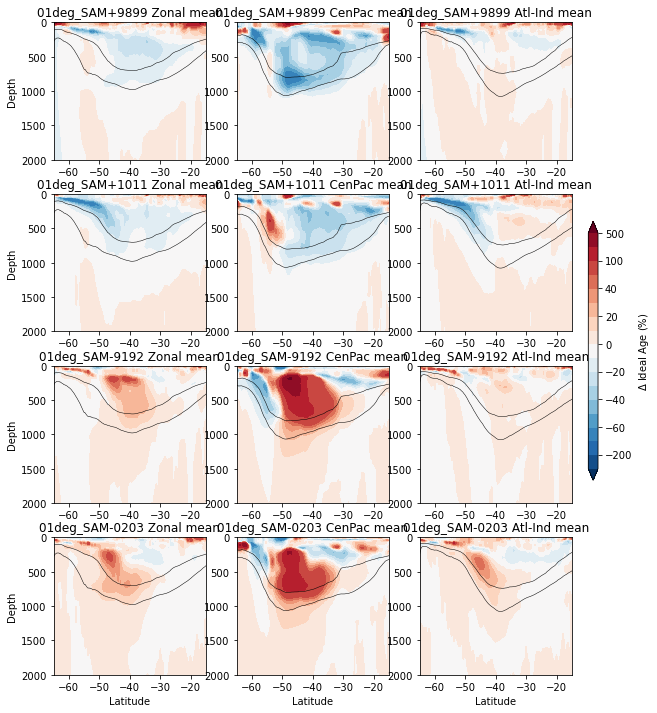

In [12]:
variable = 'age_global'
start_time='1969-01-01'
end_time = '1969-12-31'
lev1 = [-500,  -200, -100, -60, -50, -40, -30, -20, -10, 0, 10, 20, 30, 40, 50, 100, 200, 500]
lev2 = [25, 50, 100, 200, 300]
ekey='01deg_RYF9091'
expt = exptdict[ekey]['expt']
print(expt)
var = cc.querying.getvar(expt,variable,session,ncfile='ocean.nc',start_time='1950-01-01', end_time=end_time).sel(time=slice(start_time,end_time))
zonalage_RYF = var.mean('time').mean('xt_ocean')
CPage_RYF = var.mean('time').sel(xt_ocean=slice(-170,-100)).mean('xt_ocean')
wrk1 = var.mean('time').sel(xt_ocean=slice(-60,None))
wrk2 = var.mean('time').sel(xt_ocean=slice(None,-240))
AIage_RYF = xr.concat([wrk1, wrk2], dim='xt_ocean').mean('xt_ocean')

fig,ax = plt.subplots(4,3,figsize=(9,12))
plt.subplots_adjust(left=0.075, right=0.875,hspace=0.25)
ii=0
for ekey in ['01deg_SAM+9899','01deg_SAM+1011','01deg_SAM-9192','01deg_SAM-0203']:
    expt = exptdict[ekey]['expt']
    print(expt)
    var = cc.querying.getvar(expt,variable,session,ncfile='ocean.nc',start_time='1950-01-01', end_time=end_time).sel(time=slice(start_time,end_time))
    zonalage_SAM = 100*(var.mean('time').mean('xt_ocean') - zonalage_RYF)/zonalage_RYF
    #zonalage_SAM = (var.mean('time').mean('xt_ocean') - zonalage_RYF)
    p1 = zonalage_SAM.plot.contourf(ax=ax[ii,0],levels=lev1, extend='both', add_colorbar=False)
    zonalage_RYF.plot.contour(ax=ax[ii,0],levels=lev2,colors='k',linewidths=0.5)
    
    ax[ii,0].set_xlim([-65,-15])
    ax[ii,0].set_ylim([0,2000])
    ax[ii,0].set_ylabel('Depth')
    if ii<3:
        ax[ii,0].set_xlabel('')
    else:
        ax[ii,0].set_xlabel('Latitude')    
    ax[ii,0].invert_yaxis()
    ax[ii,0].set_title(ekey.lstrip('1deg_')+' Zonal mean')
    
    CPage_SAM = 100*(var.mean('time').sel(xt_ocean=slice(-170,-100)).mean('xt_ocean') - CPage_RYF)/CPage_RYF
    CPage_SAM.plot.contourf(ax=ax[ii,1],levels=lev1, extend='both', add_colorbar=False)
    CPage_RYF.plot.contour(ax=ax[ii,1],levels=lev2,colors='k',linewidths=0.5)
    
    ax[ii,1].set_xlim([-65,-15])
    ax[ii,1].set_ylim([0,2000])
    ax[ii,1].set_ylabel('')
    if ii<3:
        ax[ii,1].set_xlabel('')
    else:
        ax[ii,1].set_xlabel('Latitude')
    ax[ii,1].invert_yaxis()
    ax[ii,1].set_title(ekey.lstrip('1deg_')+' CenPac mean')
    
    
    wrk1 = var.mean('time').sel(xt_ocean=slice(-60,None))
    wrk2 = var.mean('time').sel(xt_ocean=slice(None,-240))
    AIage_SAM = 100*(xr.concat([wrk1, wrk2], dim='xt_ocean').mean('xt_ocean') - AIage_RYF)/AIage_RYF
    AIage_SAM.plot.contourf(ax=ax[ii,2],levels=lev1, extend='both', add_colorbar=False)
    AIage_RYF.plot.contour(ax=ax[ii,2],levels=lev2,colors='k',linewidths=0.5)
    
    ax[ii,2].set_xlim([-65,-15])
    ax[ii,2].set_ylim([0,2000])
    ax[ii,2].set_ylabel('')
    if ii<3:
        ax[ii,2].set_xlabel('')
    else:
        ax[ii,2].set_xlabel('Latitude')
    ax[ii,2].invert_yaxis()
    ax[ii,2].set_title(ekey.lstrip('1deg_')+' Atl-Ind mean')
    
    ii+=1
    
ax_cb = plt.axes([0.9, 0.35, 0.015, 0.3])
cb = plt.colorbar(p1, cax=ax_cb,orientation='vertical')
cb.set_label('$\Delta$ Ideal Age (%)')
plt.savefig('Age_yr19_01.pdf')

1deg_jra55_SAMextr_ryf9899_from9091_kds50
1deg_jra55_SAMextr_ryf1011_from9091_kds50
1deg_jra55_SAMextr_ryf9192_from9091_kds50
1deg_jra55_SAMextr_ryf0203_from9091_kds50


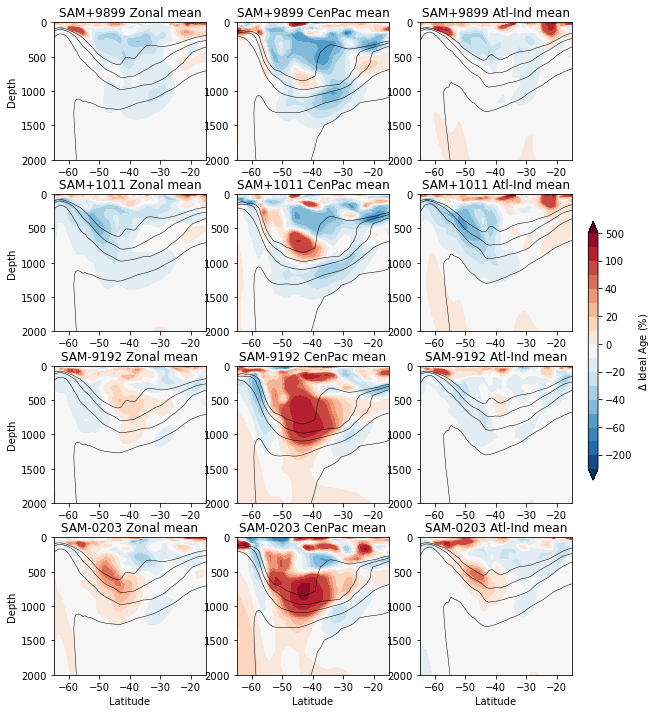

In [27]:
## This one is the one that matches Darryn's plots.
## Note that it uses 1deg_jra55_ryf9091_kds50_july, which I think is wrong - we should be using 1deg_jra55_ryf9091_kds50_july_bkd.

variable = 'age_global'
start_time='2229-01-01'
end_time = '2229-12-31'
lev1 = [-500,  -200, -100, -60, -50, -40, -30, -20, -10, 0, 10, 20, 30, 40, 50, 100, 200, 500]
lev2 = [25, 50, 100, 200, 300]
ekey='1deg_RYF9091'
expt = exptdict[ekey]['expt']
var = cc.querying.getvar(expt,variable,session,ncfile='ocean.nc',start_time='2200-01-01', end_time=end_time).sel(time=slice(start_time,end_time))
zonalage_RYF = var.mean('time').mean('xt_ocean')
CPage_RYF = var.mean('time').sel(xt_ocean=slice(-170,-100)).mean('xt_ocean')
wrk1 = var.mean('time').sel(xt_ocean=slice(-60,None))
wrk2 = var.mean('time').sel(xt_ocean=slice(None,-240))
AIage_RYF = xr.concat([wrk1, wrk2], dim='xt_ocean').mean('xt_ocean')

fig,ax = plt.subplots(4,3,figsize=(9,12))
plt.subplots_adjust(left=0.075, right=0.875,hspace=0.25)
ii=0
for ekey in ['1deg_SAM+9899','1deg_SAM+1011','1deg_SAM-9192','1deg_SAM-0203']:
    expt = exptdict[ekey]['expt']
    print(expt)
    var = cc.querying.getvar(expt,variable,session,ncfile='ocean.nc',start_time='2200-01-01', end_time=end_time).sel(time=slice(start_time,end_time))
    zonalage_SAM = 100*(var.mean('time').mean('xt_ocean') - zonalage_RYF)/zonalage_RYF
    #zonalage_SAM = (var.mean('time').mean('xt_ocean') - zonalage_RYF)
    p1 = zonalage_SAM.plot.contourf(ax=ax[ii,0],levels=lev1, extend='both', add_colorbar=False)
    zonalage_RYF.plot.contour(ax=ax[ii,0],levels=lev2,colors='k',linewidths=0.5)
    
    ax[ii,0].set_xlim([-65,-15])
    ax[ii,0].set_ylim([0,2000])
    ax[ii,0].set_ylabel('Depth')
    if ii<3:
        ax[ii,0].set_xlabel('')
    else:
        ax[ii,0].set_xlabel('Latitude')    
    ax[ii,0].invert_yaxis()
    ax[ii,0].set_title(ekey.lstrip('1deg_')+' Zonal mean')
    
    CPage_SAM = 100*(var.mean('time').sel(xt_ocean=slice(-170,-100)).mean('xt_ocean') - CPage_RYF)/CPage_RYF
    CPage_SAM.plot.contourf(ax=ax[ii,1],levels=lev1, extend='both', add_colorbar=False)
    CPage_RYF.plot.contour(ax=ax[ii,1],levels=lev2,colors='k',linewidths=0.5)
    
    ax[ii,1].set_xlim([-65,-15])
    ax[ii,1].set_ylim([0,2000])
    ax[ii,1].set_ylabel('')
    if ii<3:
        ax[ii,1].set_xlabel('')
    else:
        ax[ii,1].set_xlabel('Latitude')
    ax[ii,1].invert_yaxis()
    ax[ii,1].set_title(ekey.lstrip('1deg_')+' CenPac mean')
    
    
    wrk1 = var.mean('time').sel(xt_ocean=slice(-60,None))
    wrk2 = var.mean('time').sel(xt_ocean=slice(None,-240))
    AIage_SAM = 100*(xr.concat([wrk1, wrk2], dim='xt_ocean').mean('xt_ocean') - AIage_RYF)/AIage_RYF
    AIage_SAM.plot.contourf(ax=ax[ii,2],levels=lev1, extend='both', add_colorbar=False)
    AIage_RYF.plot.contour(ax=ax[ii,2],levels=lev2,colors='k',linewidths=0.5)
    
    ax[ii,2].set_xlim([-65,-15])
    ax[ii,2].set_ylim([0,2000])
    ax[ii,2].set_ylabel('')
    if ii<3:
        ax[ii,2].set_xlabel('')
    else:
        ax[ii,2].set_xlabel('Latitude')
    ax[ii,2].invert_yaxis()
    ax[ii,2].set_title(ekey.lstrip('1deg_')+' Atl-Ind mean')
    
    ii+=1
    
ax_cb = plt.axes([0.9, 0.35, 0.015, 0.3])
cb = plt.colorbar(p1, cax=ax_cb,orientation='vertical')
cb.set_label('$\Delta$ Ideal Age (%)')
plt.savefig('Age.pdf')

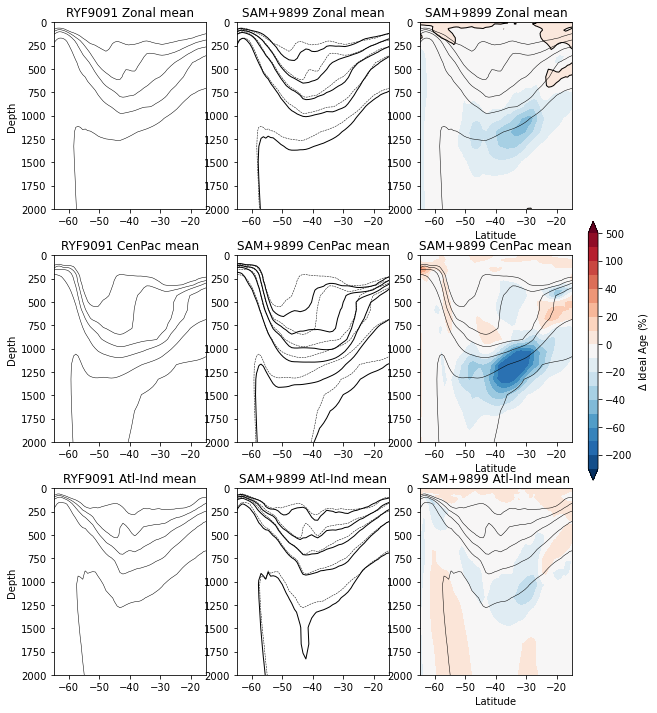

In [80]:
## This one plots absolute age to chross-check differences with Darryn
variable = 'age_global'
start_time='2229-01-01'
end_time = '2229-12-31'
lev1 = [-500,  -200, -100, -60, -50, -40, -30, -20, -10, 0, 10, 20, 30, 40, 50, 100, 200, 500]
lev2 = [10,25, 50, 100, 200, 300]

ekey='1deg_RYF9091'
expt = exptdict[ekey]['expt']
var = cc.querying.getvar(expt,variable,session,ncfile='ocean.nc',start_time='2200-01-01', end_time=end_time).sel(time=slice(start_time,end_time))
zonalage_RYF = var.mean('time').mean('xt_ocean')
CPage_RYF = var.mean('time').sel(xt_ocean=slice(-170,-100)).mean('xt_ocean')
AIage_RYF = var.mean('time').sel(xt_ocean=slice(-60,120)).mean('xt_ocean')

fig,ax = plt.subplots(3,3,figsize=(9,12))
plt.subplots_adjust(left=0.075, right=0.875,hspace=0.25)
ii=0
zonalage_RYF.plot.contour(ax=ax[0,ii],levels=lev2,colors='k',linewidths=0.5)
CPage_RYF.plot.contour(ax=ax[1,ii],levels=lev2,colors='k',linewidths=0.5)
AIage_RYF.plot.contour(ax=ax[2,ii],levels=lev2,colors='k',linewidths=0.5)

for jj in [0, 1, 2]:
    ax[jj,ii].set_xlim([-65,-15])
    ax[jj,ii].set_ylim([0,2000])
    ax[jj,ii].set_ylabel('Depth')
    if ii<2:
        ax[jj,ii].set_xlabel('')
    else:
        ax[jj,ii].set_xlabel('Latitude')    
    ax[jj,ii].invert_yaxis()

ax[0,ii].set_title(ekey.lstrip('1deg_')+' Zonal mean')
ax[1,ii].set_title(ekey.lstrip('1deg_')+' CenPac mean')
ax[2,ii].set_title(ekey.lstrip('1deg_')+' Atl-Ind mean')


ekey = '1deg_SAM+9899'
expt = exptdict[ekey]['expt']
var = cc.querying.getvar(expt,variable,session,ncfile='ocean.nc',start_time='2200-01-01', end_time=end_time).sel(time=slice(start_time,end_time))
zonalage_SAM = var.mean('time').mean('xt_ocean')
CPage_SAM = var.mean('time').sel(xt_ocean=slice(-170,-100)).mean('xt_ocean')
AIage_SAM = var.mean('time').sel(xt_ocean=slice(-60,120)).mean('xt_ocean')

ii=1
zonalage_RYF.plot.contour(ax=ax[0,ii],levels=lev2,colors='k',linestyles='dashed',linewidths=0.5)
zonalage_SAM.plot.contour(ax=ax[0,ii],levels=lev2,colors='k',linewidths=1)
CPage_RYF.plot.contour(ax=ax[1,ii],levels=lev2,colors='k',linestyles='dashed',linewidths=0.5)
CPage_SAM.plot.contour(ax=ax[1,ii],levels=lev2,colors='k',linewidths=1)
AIage_RYF.plot.contour(ax=ax[2,ii],levels=lev2,colors='k',linestyles='dashed',linewidths=0.5)
AIage_SAM.plot.contour(ax=ax[2,ii],levels=lev2,colors='k',linewidths=1)


for jj in [0, 1, 2]:
    ax[jj,ii].set_xlim([-65,-15])
    ax[jj,ii].set_ylim([0,2000])
    ax[jj,ii].set_ylabel('')
    if ii<2:
        ax[jj,ii].set_xlabel('')
    else:
        ax[jj,ii].set_xlabel('Latitude')    
    ax[jj,ii].invert_yaxis()

ax[0,ii].set_title(ekey.lstrip('1deg_')+' Zonal mean')
ax[1,ii].set_title(ekey.lstrip('1deg_')+' CenPac mean')
ax[2,ii].set_title(ekey.lstrip('1deg_')+' Atl-Ind mean')

zonalage_diff = zonalage_SAM - zonalage_RYF
CPage_diff = CPage_SAM - CPage_RYF
AIage_diff = AIage_SAM - AIage_RYF


ii=2
zonalage_RYF.plot.contour(ax=ax[0,ii],levels=lev2,colors='k',linewidths=0.5)
p1=zonalage_diff.plot.contourf(ax=ax[0,ii],levels=lev1, add_colorbar=False, extend='both')
zonalage_diff.plot.contour(ax=ax[0,ii],levels=[0,],colors='k',linewidths=1)
CPage_RYF.plot.contour(ax=ax[1,ii],levels=lev2,colors='k',linewidths=0.5)
CPage_diff.plot.contourf(ax=ax[1,ii],levels=lev1, add_colorbar=False)
AIage_RYF.plot.contour(ax=ax[2,ii],levels=lev2,colors='k',linewidths=0.5)
AIage_diff.plot.contourf(ax=ax[2,ii],levels=lev1, add_colorbar=False)


for jj in [0, 1, 2]:
    ax[jj,ii].set_xlim([-65,-15])
    ax[jj,ii].set_ylim([0,2000])
    ax[jj,ii].set_ylabel('')
    if ii<2:
        ax[jj,ii].set_xlabel('')
    else:
        ax[jj,ii].set_xlabel('Latitude')    
    ax[jj,ii].invert_yaxis()

ax[0,ii].set_title(ekey.lstrip('1deg_')+' Zonal mean')
ax[1,ii].set_title(ekey.lstrip('1deg_')+' CenPac mean')
ax[2,ii].set_title(ekey.lstrip('1deg_')+' Atl-Ind mean')


ax_cb = plt.axes([0.9, 0.35, 0.015, 0.3])
cb = plt.colorbar(p1, cax=ax_cb,orientation='vertical')
cb.set_label('$\Delta$ Ideal Age (%)')
plt.savefig('Age.pdf')